In [2]:
import os 
import json
import pandas as pd
import seaborn as sns
import numpy as np
import math

import pandas as pd

from utils.analysys_utils import list_experiments_in_dir

In [3]:
experiments_path = os.path.join(os.getcwd(), "runs", "momentum_train_size_exps", "sidarthe_extended", "Italy")
experiments = list_experiments_in_dir(experiments_path)


In [4]:
data = {
    "m": [],
    "train_size": [],
    "val_loss": []
}

for exp in experiments:
    try: # avoid NaNs
        data['val_loss'].append(exp['final']['best_epoch']['val_loss'])    
        data['m'].append(exp['settings']['m'])
        data['train_size'].append(exp['settings']['train_size'])
    except:
        print(exp['uuid'])
    

df = pd.DataFrame(data)
df = df[df['train_size'] != 40]

In [5]:
# group by m and a with average
df_by_t_m = df.groupby(['m','train_size']).agg(['mean', 'count', 'std'])['val_loss']

#df_by_t_m['ci95_hi'] = df_by_t_m['mean'] + 1*96 * df_by_t_m['std'] / math.sqrt(df_by_t_m['count'])
df_by_t_m['ci95_hi'] = 1.96 * df_by_t_m['std'] / df_by_t_m['count'].pow(0.5)
df_by_t_m['ci95_lo'] = 1.96 * df_by_t_m['std'] / df_by_t_m['count'].pow(0.5)

df_by_t_m

mean  count           std       ci95_hi       ci95_lo
m    train_size                                                               
0.00 60          3.111778e+06     15  6.012191e+06  3.042588e+06  3.042588e+06
     80          3.034982e+06     15  5.545119e+06  2.806218e+06  2.806218e+06
     100         3.819171e+06     15  8.832435e+06  4.469829e+06  4.469829e+06
0.05 60          8.105517e+04     15  1.226845e+05  6.208695e+04  6.208695e+04
     80          4.741125e+04     15  7.883064e+04  3.989381e+04  3.989381e+04
     100         1.814961e+04     15  1.259243e+04  6.372646e+03  6.372646e+03
0.10 60          5.070661e+04     15  2.736999e+04  1.385113e+04  1.385113e+04
     80          3.137928e+04     15  1.767189e+04  8.943211e+03  8.943211e+03
     100         1.361428e+04     15  6.716988e+03  3.399265e+03  3.399265e+03
0.15 60          4.739690e+04     15  2.687948e+04  1.360289e+04  1.360289e+04
     80          2.870784e+04     15  1.861284e+04  9.419395e+03  9.419395e+03
     100         1.491178e+04     15  5.992747e+03  3.032748e+03  3.032748e+03
0.20 60          4.989476e+04     15  2.536647e+04  1.283720e+04  1.283720e+04
     80          2.799019e+04     15  1.597906e+04  8.086518e+03  8.086518e+03
     100         1.702587e+04     15  8.144340e+03  4.121604e+03  4.121604e+03
0.25 60          5.250459e+04     15  2.628715e+04  1.330313e+04  1.330313e+04
     80          2.672695e+04     15  1.506288e+04  7.622870e+03  7.622870e+03
     100         1.708849e+04     15  6.667623e+03  3.374283e+03  3.374283e+03
0.30 60          5.637818e+04     15  2.907409e+04  1.471352e+04  1.471352e+04
     80          2.938733e+04     15  1.177265e+04  5.957780e+03  5.957780e+03
     100         1.725240e+04     15  9.166947e+03  4.639115e+03  4.639115e+03
0.35 60          5.493605e+04     15  3.150087e+04  1.594164e+04  1.594164e+04
     80          2.921238e+04     15  1.170556e+04  5.923830e+03  5.923830e+03
     100         1.786047e+04     15  8.989121e+03  4.549123e+03  4.549123e+03
0.40 60          5.567768e+04     15  2.920749e+04  1.478103e+04  1.478103e+04
     80          2.827126e+04     15  1.346034e+04  6.811871e+03  6.811871e+03
     100         1.756512e+04     15  1.042233e+04  5.274425e+03  5.274425e+03
0.45 60          5.381723e+04     15  2.890117e+04  1.462601e+04  1.462601e+04
     80          2.787535e+04     15  1.314981e+04  6.654721e+03  6.654721e+03
     100         1.597798e+04     15  7.504759e+03  3.797932e+03  3.797932e+03
0.50 60          5.236686e+04     15  2.764562e+04  1.399061e+04  1.399061e+04
     80          3.085628e+04     15  1.626702e+04  8.232245e+03  8.232245e+03
     100         1.558632e+04     15  7.975586e+03  4.036203e+03  4.036203e+03

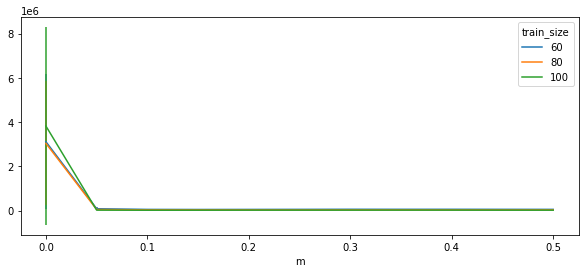

In [14]:
df_by_t_m[['mean', 'ci95_hi']].unstack()[0.00:].plot(y='mean', subplots=False, figsize=(10, 4), sharex=False, yerr='ci95_hi')